# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [48]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [49]:
# Load the dataset
data = pd.read_csv('data/vehicles.csv')
data.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [50]:
# Find the duplicate row count
duplicates = data.duplicated().sum()
# Display duplicate rows if any
if duplicates > 0:
    print("Duplicate rows:")
    print(data[data.duplicated()])
else:
    print("No duplicate rows found.")


No duplicate rows found.


In [51]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
dtype: int64


In [52]:
# Define the columns to check for null values
columns_to_check = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color']

# Check for rows where all specified columns are null
null_rows = data[columns_to_check].isnull().all(axis=1).sum()

print(f"Number of rows where all specified columns are null: {null_rows}")

Number of rows where all specified columns are null: 68


In [53]:
# Identify rows where all specified columns are null
null_rows_mask = data[columns_to_check].isnull().all(axis=1)

# Remove rows where all specified columns are null
df_cleaned = data[~null_rows_mask]

# Save the cleaned DataFrame to a new CSV file
df_cleaned.to_csv('data/vehicles_cleaned.csv', index=False)

print(f"Original number of rows: {len(data)}")
print(f"Number of rows after removing null rows: {len(df_cleaned)}")
print("Cleaned data saved to 'data/vehicles_cleaned.csv'")

Original number of rows: 426880
Number of rows after removing null rows: 426812
Cleaned data saved to 'data/vehicles_cleaned.csv'


In [54]:
df_cleaned.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
27,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,al
28,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,al
29,7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,al
30,7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,NaN,NaN,pickup,red,al
31,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,NaN,rwd,full-size,truck,black,al


In [55]:
# Fill all null values with 'unknown'
df_filled = df_cleaned.fillna('unknown')

# Fill null values in 'cylinders' column with 'unknown'
#data['cylinders'] = data['cylinders'].fillna('unknown')

# Save the DataFrame with null values filled to a new CSV file
df_filled.to_csv('data/vehicles_cleaned.csv', index=False)

print("Null values replaced with 'unknown' and saved to 'data/vehicles_cleaned.csv'")

data = df_filled

Null values replaced with 'unknown' and saved to 'data/vehicles_cleaned.csv'


In [56]:
data.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
27,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,unknown,unknown,pickup,white,al
28,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,unknown,unknown,pickup,blue,al
29,7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,unknown,unknown,pickup,red,al
30,7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,unknown,unknown,pickup,red,al
31,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,unknown,rwd,full-size,truck,black,al


In [57]:
# Final checks for null, missing, and duplicate values
# Find the duplicate row count
duplicates = data.duplicated().sum()
# Display duplicate rows if any
if duplicates > 0:
    print("Duplicate rows:")
    print(data[data.duplicated()])
else:
    print("No duplicate rows found.")


# Check for missing values in each column
missing_values = data.isnull().sum()

# Print columns with missing values and their counts
print("Missing values per column:")
print(missing_values[missing_values > 0])

# Check for rows where all specified columns are null
null_rows = data[columns_to_check].isnull().all(axis=1).sum()

print(f"Number of rows where all specified columns are null: {null_rows}")

No duplicate rows found.
Missing values per column:
Series([], dtype: int64)
Number of rows where all specified columns are null: 0


/var/folders/9j/st5lghgs3dj90nb65prwvs0c0000gn/T/ipykernel_11213/2920610825.py:5: DtypeWarning: Columns (3,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/vehicles_cleaned.csv', dtype=dtypes)


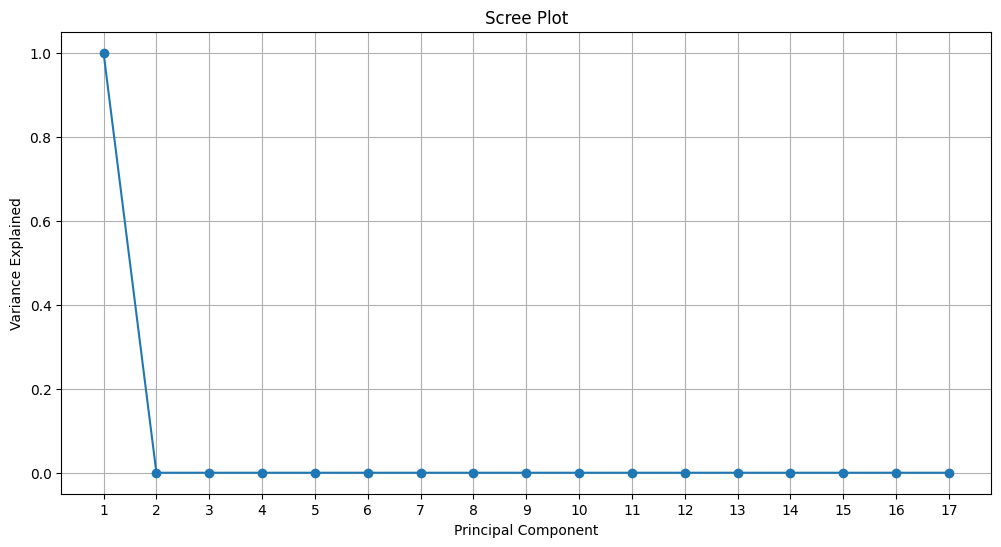

In [63]:

# Specify data types for columns with mixed types
dtypes = {'cylinders': str, 'drive': str}

# Load the dataset with specified data types
data = pd.read_csv('data/vehicles_cleaned.csv', dtype=dtypes)

# Handle categorical variables
categorical_cols = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color']
for col in categorical_cols:
    data[col] = data[col].astype('category')
    data[col] = data[col].cat.codes

# Drop the 'price' column
X = data.drop('price', axis=1)

# Impute missing values with 0
X = X.fillna(0)

# Ensure all columns are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Impute missing values again after conversion
X = X.fillna(0)

# Perform PCA
pca = PCA()
pca.fit(X)

# Plot the scree plot
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))  # Set x-axis ticks to be each component
plt.grid(True)
plt.show()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.